### Functional tests (ft.csv) - [One record per functional test per task per repetition per time point per visit per subject]

This dataset contains info on:
- Timed 25-Foot Walk (T25FW)
- Nine Hole Peg Test (NHPT) 
- Paced Auditory Serial Addition Test (PASAT)
- Symbol Digit Modalities Test (SDMT)

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'ft.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
ftests = pd.read_csv(file_path)

C:\Users\lenne\AppData\Local\Temp\ipykernel_18012\271289453.py:17: DtypeWarning: Columns (22,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ftests = pd.read_csv(file_path)


Check how many missing values we have per column. 

In [2]:
missing_percentage_ftests = (ftests.isnull().sum() / len(ftests)) * 100
missing_ftests = pd.DataFrame({'Column Name': missing_percentage_ftests.index, 'Missing Percentage': missing_percentage_ftests.values})
missing_ftests = missing_ftests.sort_values(by='Missing Percentage', ascending=False)
print(missing_ftests)

   Column Name  Missing Percentage
12       FTPOS          100.000000
34    FTRFTDTC          100.000000
33    FTTPTREF          100.000000
32      FTELTM          100.000000
5      FTREFID          100.000000
6       FTSPID          100.000000
21    FTMETHOD          100.000000
23     FTDRVFL          100.000000
9     FTTSTDTL          100.000000
20       FTNAM          100.000000
24      FTEVAL          100.000000
28       FTDTC           99.741461
19    FTREASND           98.910738
18      FTSTAT           98.466166
22      FTBLFL           96.126469
30       FTTPT           93.224946
31    FTTPTNUM           93.224946
27     VISITDY           84.545236
14    FTORRESU           42.144384
17    FTSTRESU           42.144384
35    FTREPNUM           41.147931
11      FTSCAT           33.508179
4      FTGRPID           33.461774
16    FTSTRESN           27.668258
29        FTDY           24.805267
15    FTSTRESC            1.518089
13     FTORRES            1.518089
1       DOMAIN      

Remove columns with more than 90% missingness as well as redundant columns.

In [3]:
# Set the threshold for missing percentage
threshold = 90

# Filter columns based on missing percentage
columns_to_drop = missing_ftests[missing_ftests['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
ftests = ftests.drop(columns=columns_to_drop)

# Remove redundant columns
ftests = ftests.drop(columns=['STUDYID', 'DOMAIN', 'FTTESTCD', 'FTORRES', 'FTORRESU', 'FTSTRESU'])

In [4]:
ftests.sort_values(by=['USUBJID', 'FTSEQ'], inplace=True)
ftests.head()

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
193389,MSOAC/0014,1,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.5,4.5,2.0,BASELINE,NaN,NaN,1.0
193354,MSOAC/0014,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.4,4.4,2.0,BASELINE,NaN,NaN,2.0
196691,MSOAC/0014,3,T25FW001,T25FW1-More Than Two Attempts,T25FW,NaN,N,NaN,2.0,BASELINE,NaN,NaN,NaN
192233,MSOAC/0014,4,NHPT001,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,DOMINANT HAND,25.6,25.6,2.0,BASELINE,NaN,NaN,1.0
191936,MSOAC/0014,5,NHPT001,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,DOMINANT HAND,23.7,23.7,2.0,BASELINE,NaN,NaN,2.0


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **FTTESTCD**: Functional Test Short Name (contains the same info as "FTTEST" = Functional Test Name)
- **FTORRES**: Finding in Original Units (contains the same info as "FTSTRESC" = Character Result/Finding in Std Format, except that there can be incosistencies in the values of FTORRES e.g. Y Yes YES used interchangeably for the same thing)
- **FTORRESU, FTSTRESU**: Original & Standard units (seconds in both cases)
- **FTPOS, FTRFTDTC, FTTPTREF, FTELTM, FTREFID, FTSPID, FTMETHOD, FTDRVFL, FTTSTDTL, FTNAM, FTEVAL**: all values missing and not even mentioned in the data dictionary 
- **FTDTC**: Date/Time of Finding (missing for 99.7% of observations)
- **FTREASND**: Reason Not Performed (missing for 98.9% of observations) **(keep in mind for extreme observations)**
- **FTSTAT**: Completion Status (missing for 98.5% of observations)
- **FTBLFL**: Baseline Flag (missing for 96.1% of observations)
- **FTTPT, FTTPTNUM**: Planned Time Point Name & Number (missing for 93.2% of observations)

In [5]:
unique_usubjid_count = ftests['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2465


**We have data on all 2465 patients for the functional tests.**

Which columns are numeric and categorical? (see also SDTM fields in Data Dictionary)

In [6]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in ftests.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,FTSEQ,numeric
2,FTGRPID,categorical
3,FTTEST,categorical
4,FTCAT,categorical
5,FTSCAT,categorical
6,FTSTRESC,categorical
7,FTSTRESN,numeric
8,VISITNUM,numeric
9,VISIT,categorical


- Descriptive statistics for numeric variables

In [7]:
numeric_columns = ['FTSEQ', 'FTSTRESN', 'VISITNUM', 'VISITDY', 'FTDY', 'FTREPNUM']

descriptive_numeric = {
    'Count': ftests[numeric_columns].count(), 
    'Missing Cases': ftests[numeric_columns].isna().sum(),
    'Missing %': round((ftests[numeric_columns].isna().sum() / len(ftests)) * 100, 2),  
    'Median': ftests[numeric_columns].median(),
    'Standard Deviation': ftests[numeric_columns].std()
}

num_ftests = pd.DataFrame(descriptive_numeric)
num_ftests

,Count,Missing Cases,Missing %,Median,Standard Deviation
FTSEQ,241356,0,0.00,51.0,38.113581
FTSTRESN,174577,66779,27.67,22.0,20.327130
VISITNUM,241356,0,0.00,11.0,205.031511
VISITDY,37301,204055,84.55,268.0,251.544301
FTDY,181487,59869,24.81,173.0,295.597788
FTREPNUM,142043,99313,41.15,1.0,0.500016


- FTSEQ (Sequence number)

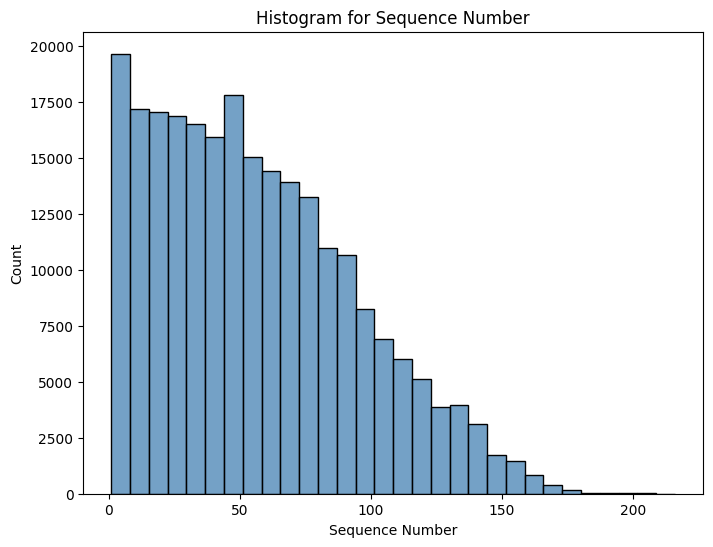

In [8]:
FTSEQ = ftests['FTSEQ'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(FTSEQ, kde=False, color='steelblue', bins=30)
plt.xlabel('Sequence Number')
plt.ylabel('Count')
plt.title('Histogram for Sequence Number')
plt.show()

- FTSTRESN (Numeric Result/Finding in Standard Units)

**NOTE:** This column gives the results for the functional tests with a numeric outcome. For this reason, we need to make a separate plot for each unique functional test name (FTTEST), but only the ones that have a numeric outcome.

**Need to check this with R&F because according to a paper, the convention for patients unable to perform is: 180 sec for T25FW & 300 sec for 9HPT - but in this dataset there are some values even larger than this?**

In [9]:
# Define the 'FTTEST' values with a numeric outcome
num_FTTEST_values = [
    'T25FW1-Time to Complete 25-Foot Walk',
    'NHPT01-Time to Complete 9-Hole Peg Test',
    'PASAT1-Total Correct',
    'SDMT01-Total Score'
]

We check how many observations each patient has for the numeric functional tests.

In [10]:
# Filter rows based on the specified values of FTTEST
filtered_rows = ftests[ftests['FTTEST'].isin(num_FTTEST_values)]

# Group by FTTEST and USUBJID, then count the number of rows for each group
outcome_measure_counts = filtered_rows.groupby(['FTTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
outcome_measure_counts


,FTTEST,USUBJID,Observation_Count
0,NHPT01-Time to Complete 9-Hole Peg Test,MSOAC/0014,8
1,NHPT01-Time to Complete 9-Hole Peg Test,MSOAC/0019,64
2,NHPT01-Time to Complete 9-Hole Peg Test,MSOAC/0024,48
3,NHPT01-Time to Complete 9-Hole Peg Test,MSOAC/0030,28
4,NHPT01-Time to Complete 9-Hole Peg Test,MSOAC/0031,56
...,...,...,...
7748,T25FW1-Time to Complete 25-Foot Walk,MSOAC/9986,14
7749,T25FW1-Time to Complete 25-Foot Walk,MSOAC/9987,18
7750,T25FW1-Time to Complete 25-Foot Walk,MSOAC/9995,18
7751,T25FW1-Time to Complete 25-Foot Walk,MSOAC/9998,32


In [11]:
outcome_measure_counts.groupby('FTTEST')['Observation_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-Time to Complete 9-Hole Peg Test,2394.0,39.156642,14.679160,4.0,28.0,40.0,48.0,76.0
PASAT1-Total Correct,2394.0,13.997911,8.730850,1.0,7.0,11.0,20.0,38.0
SDMT01-Total Score,500.0,4.888000,0.544103,2.0,5.0,5.0,5.0,6.0
T25FW1-Time to Complete 25-Foot Walk,2465.0,19.640162,7.255815,2.0,14.0,20.0,24.0,38.0


The mean represents the average number of measurements for that specific test and the count is the number of patients for which we have this outcome. There seem to be a good amount of measurements for all of the test, except for SDMT with an average of only ~5. Additionally, we only have info about the total SDMT score for 500 patients.

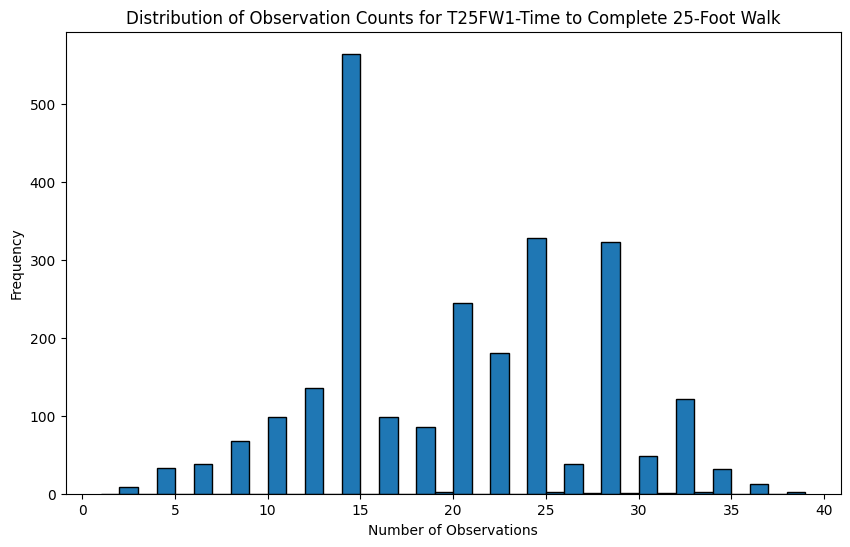

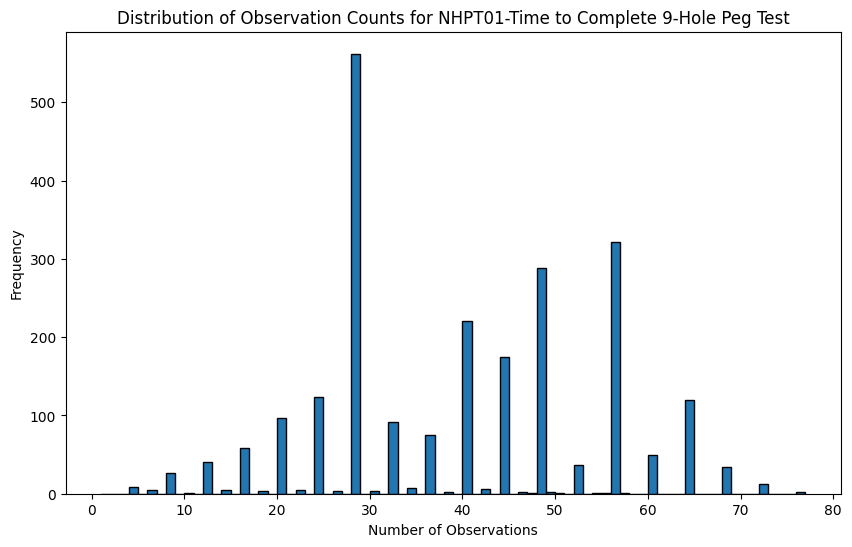

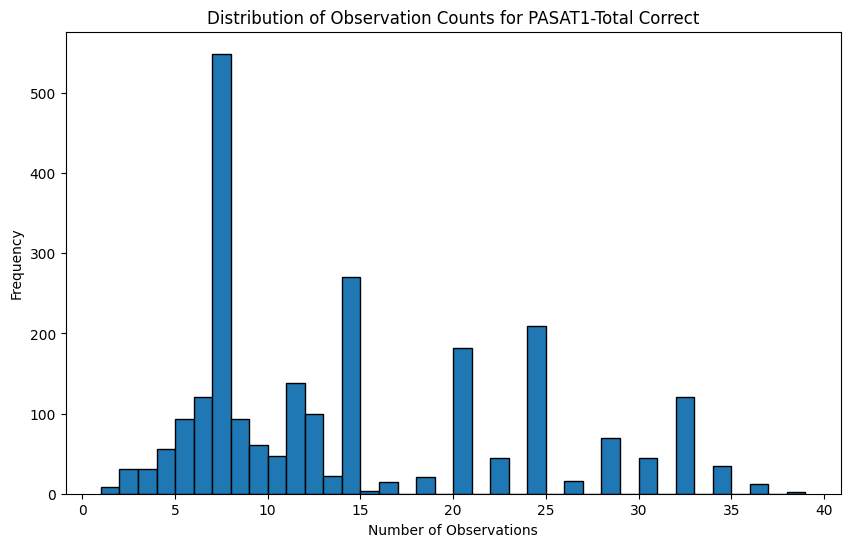

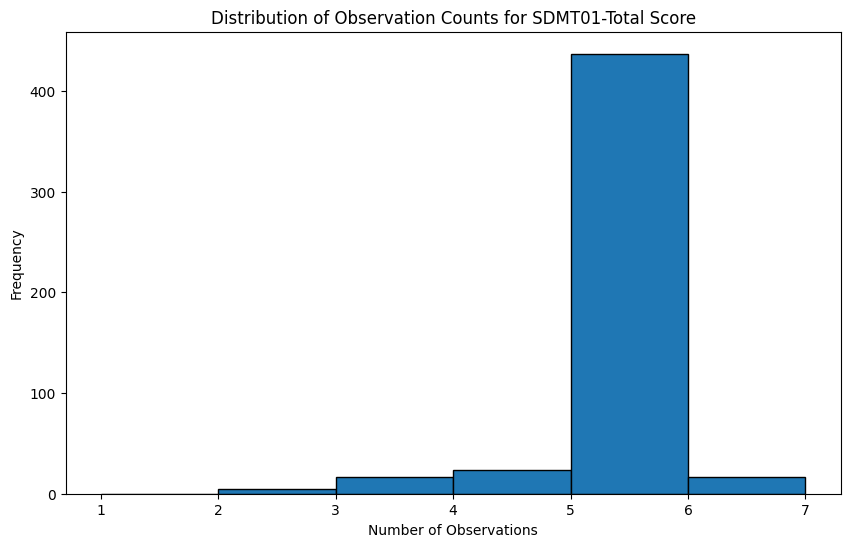

In [12]:
# Plot histograms for each FTTEST value
for fttest_value in num_FTTEST_values:
    data_subset = outcome_measure_counts[outcome_measure_counts['FTTEST'] == fttest_value]
    
    plt.figure(figsize=(10, 6))
    plt.hist(data_subset['Observation_Count'], bins=range(1, max(data_subset['Observation_Count']) + 2), edgecolor='black')
    plt.title(f'Distribution of Observation Counts for {fttest_value}')
    plt.xlabel('Number of Observations')
    plt.ylabel('Frequency')
    plt.show()

Remove the barcharts & boxplots ? Since we will aggregate this for the static dataframe anyway

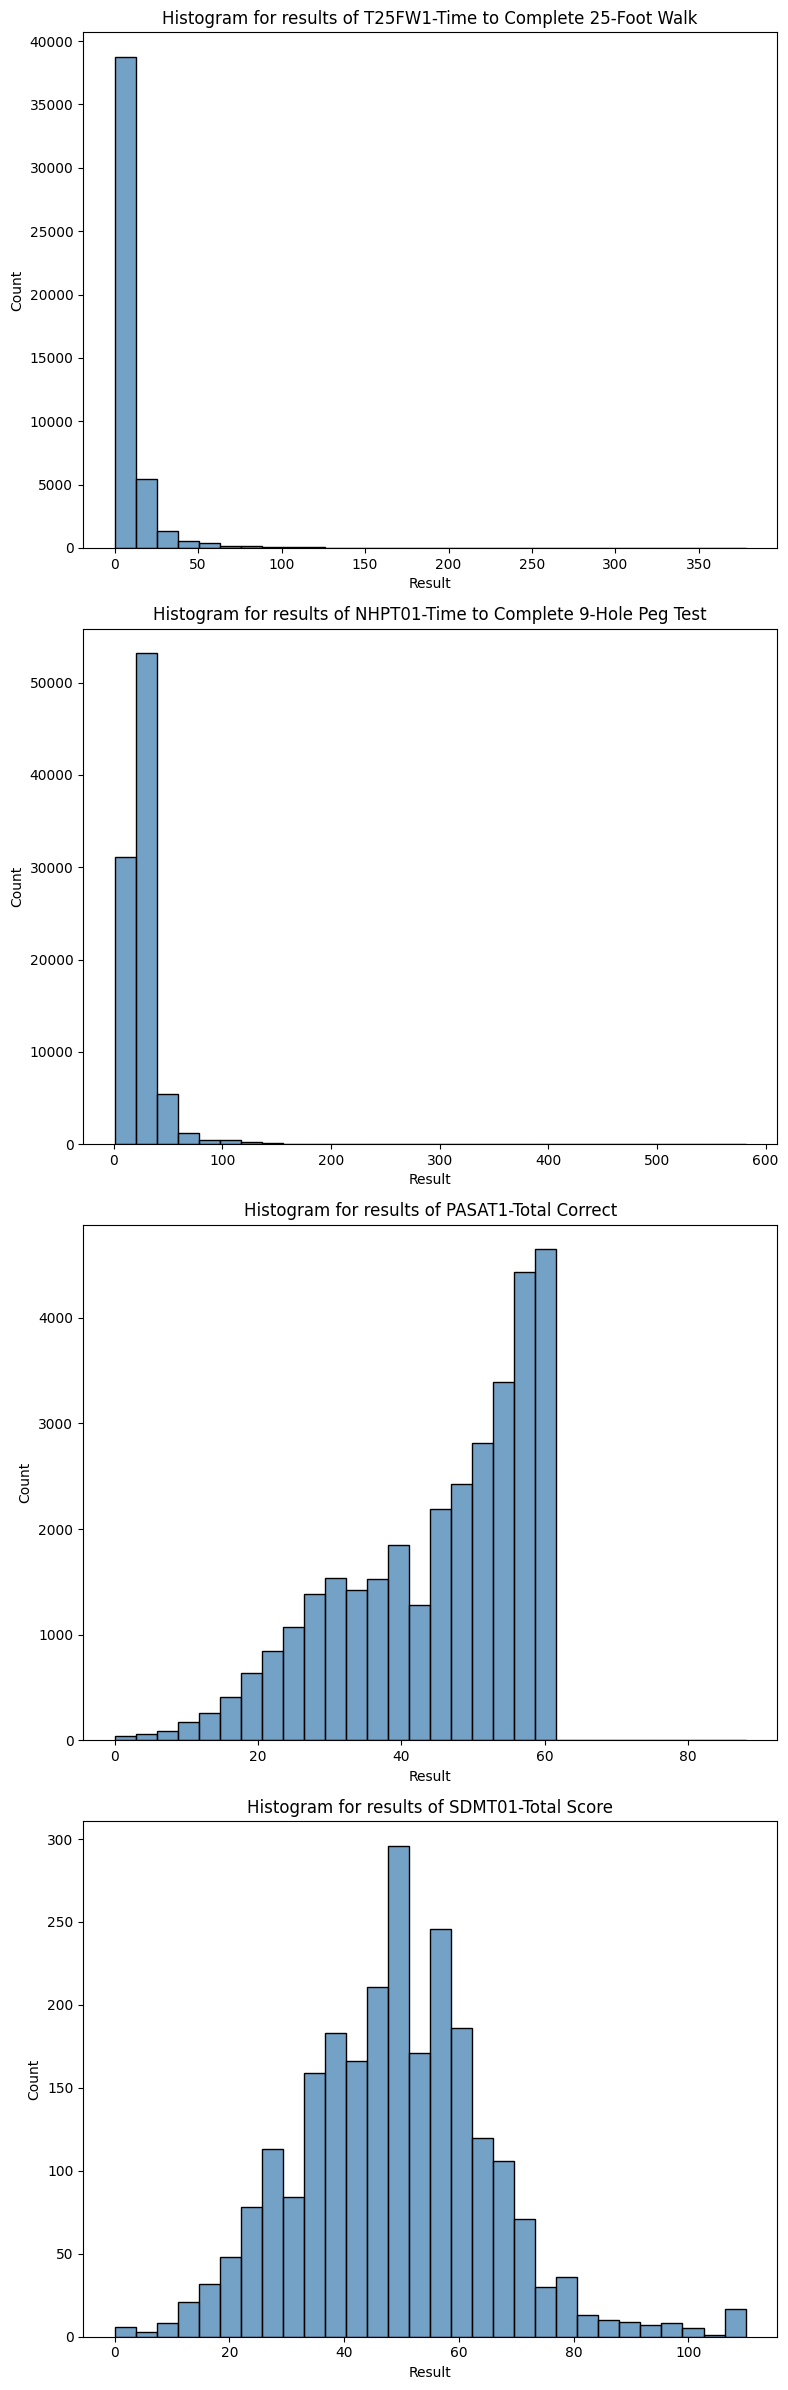

In [13]:
# Barcharts
fig, axes = plt.subplots(nrows=len(num_FTTEST_values), figsize=(8, 6 * len(num_FTTEST_values)))

# Iterate over numeric FTTEST values
for i, fttest_value in enumerate(num_FTTEST_values):
    subset_data = ftests[ftests['FTTEST'] == fttest_value]
    
    # Create histogram for the subset
    sns.histplot(subset_data['FTSTRESN'].dropna(), kde=False, color='steelblue', bins=30, ax=axes[i])
    
    # Customize subplot
    axes[i].set_xlabel('Result')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram for results of {fttest_value}')

plt.tight_layout()
plt.show()

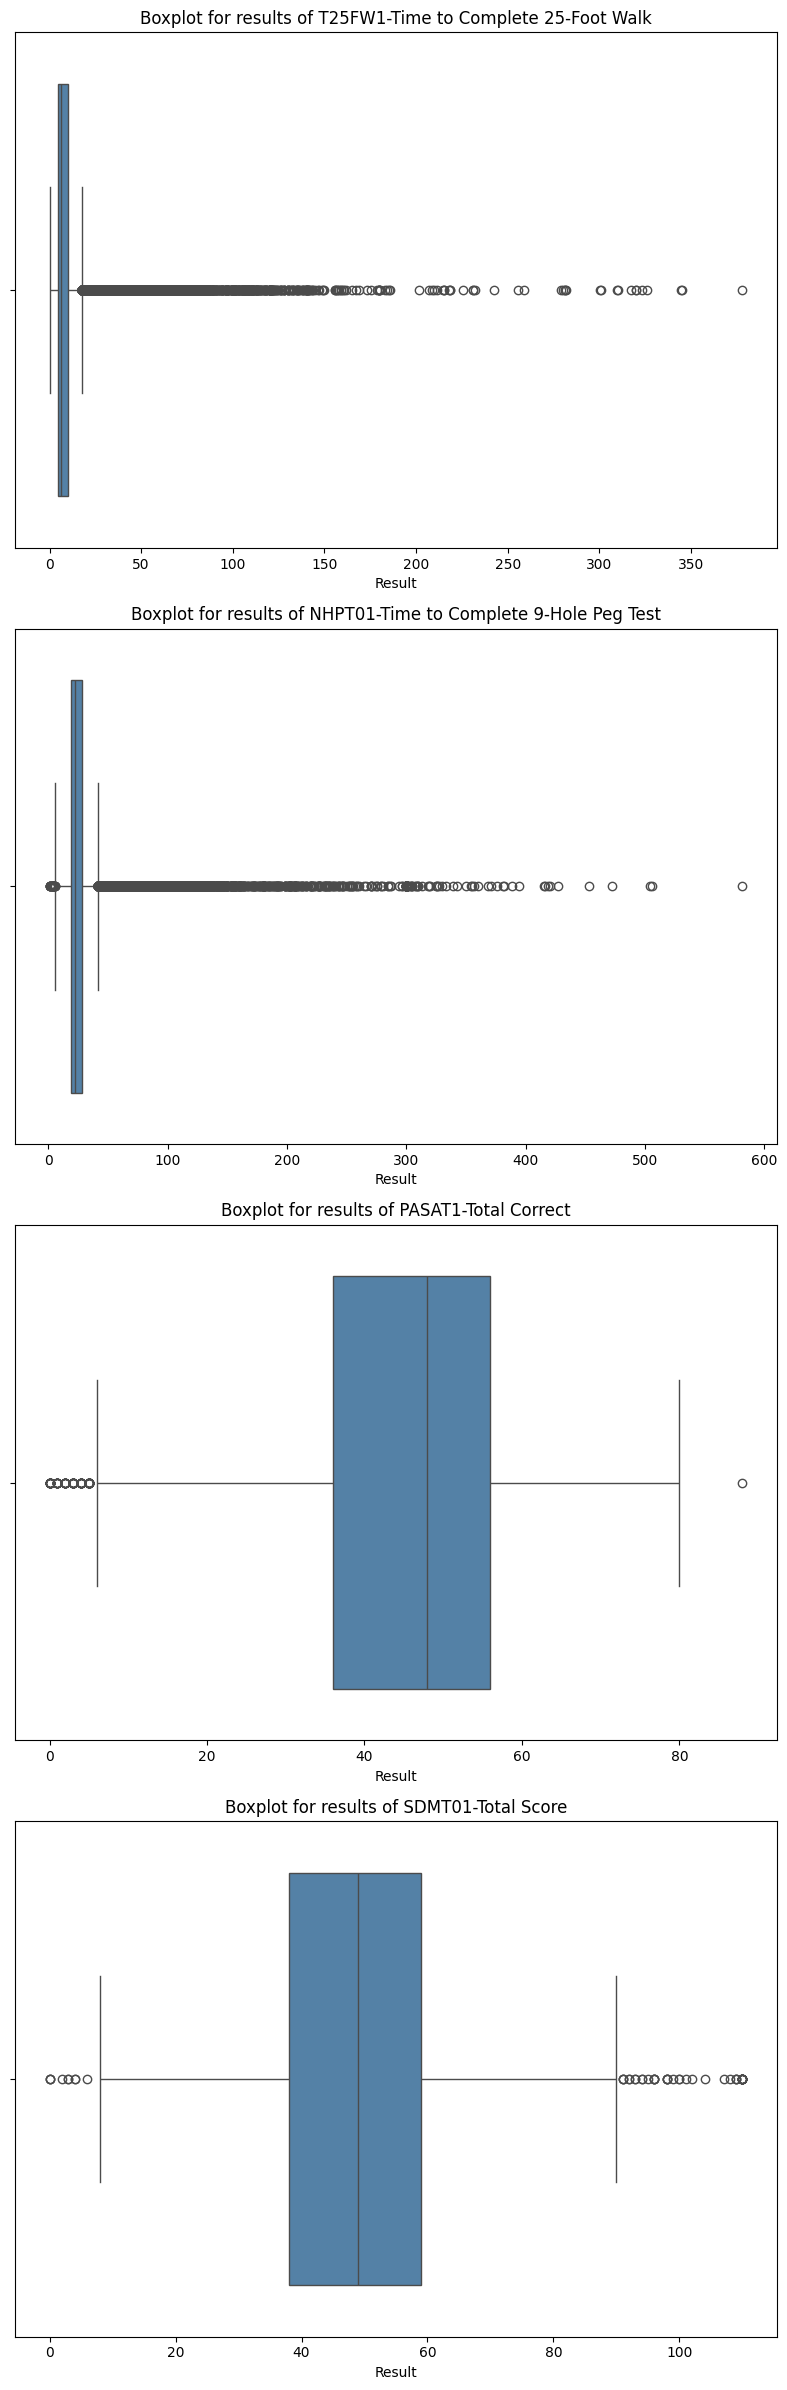

In [14]:
fig, axes = plt.subplots(nrows=len(num_FTTEST_values), figsize=(8, 6 * len(num_FTTEST_values)))

# Iterate over numeric FTTEST values
for i, fttest_value in enumerate(num_FTTEST_values):
    subset_data = ftests[ftests['FTTEST'] == fttest_value]
    
    # Create horizontal boxplot for the subset
    sns.boxplot(x=subset_data['FTSTRESN'].dropna(), color='steelblue', ax=axes[i])
    
    # Customize subplot
    axes[i].set_xlabel('Result')
    axes[i].set_title(f'Boxplot for results of {fttest_value}')

plt.tight_layout()
plt.show()

- VISITNUM (Visit Number)

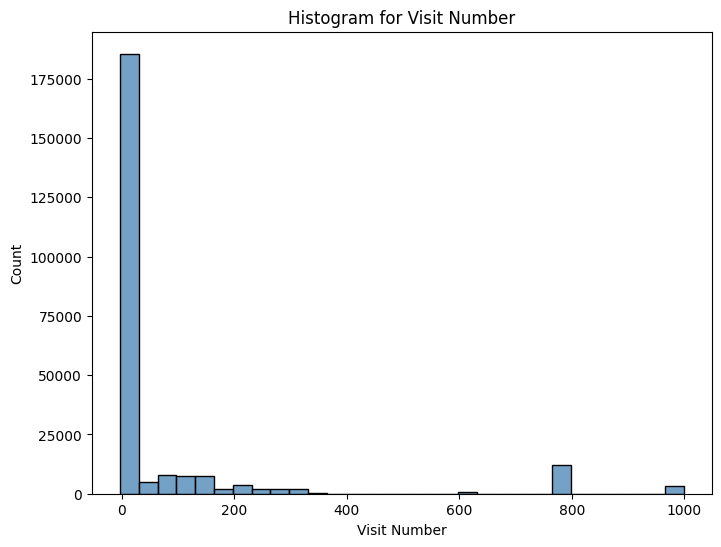

In [15]:
VISITNUM_ftests = ftests['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITNUM_ftests, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Number')
plt.ylabel('Count')
plt.title('Histogram for Visit Number')
plt.show()

- VISITDY (Visit Day)  

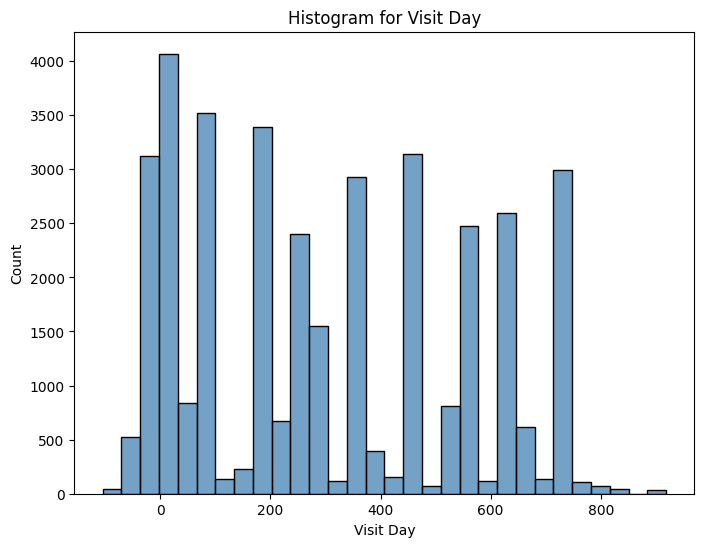

In [16]:
VISITDY_ftests = ftests['VISITDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITDY_ftests, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Day')
plt.ylabel('Count')
plt.title('Histogram for Visit Day')
plt.show()

- FTDY (Study Day of Collection)

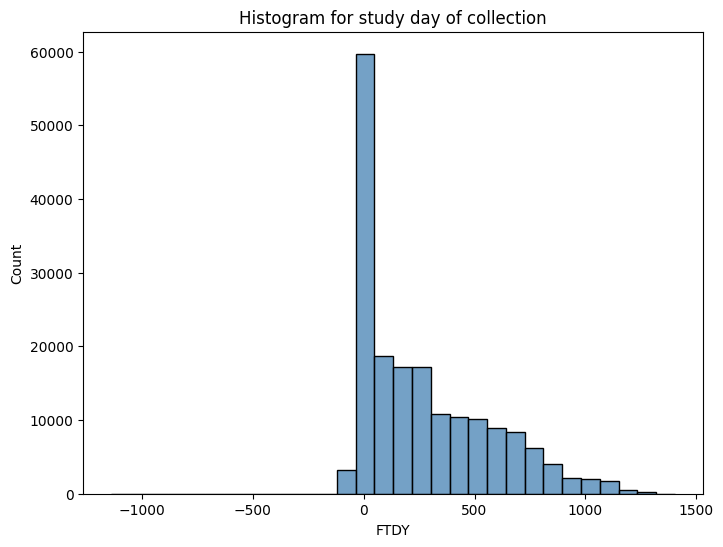

In [17]:
FTDY = ftests['FTDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(FTDY, kde=False, color='steelblue', bins=30)
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

In [18]:
FTDY.describe()

count    181487.000000
mean        263.082551
std         295.597788
min       -1138.000000
25%           1.000000
50%         173.000000
75%         456.000000
max        1404.000000
Name: FTDY, dtype: float64

In [19]:
unique_FTDY_values_count = ftests['FTDY'].nunique()
unique_FTDY_values_count

1002

1002 unique values of study day of collection

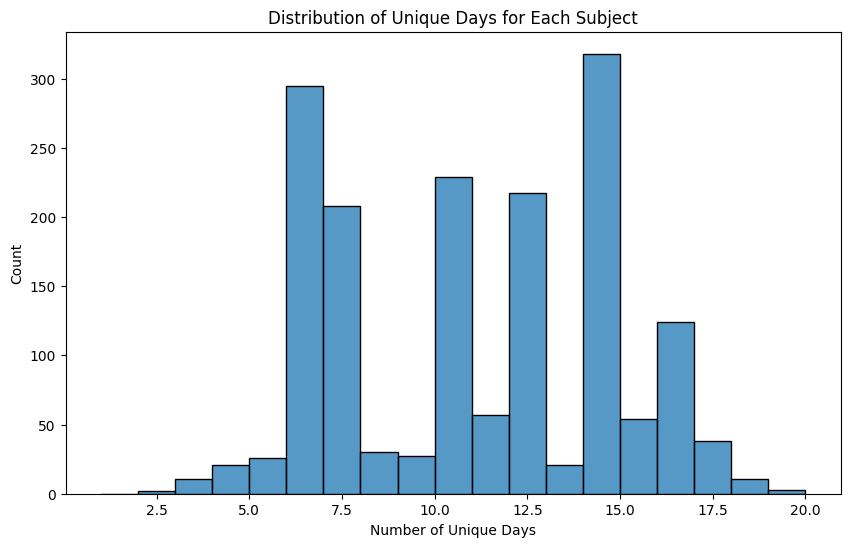

In [20]:
subject_days_count = ftests.groupby('USUBJID')['FTDY'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(subject_days_count, bins=range(1, subject_days_count.max() + 2), kde=False)
plt.title('Distribution of Unique Days for Each Subject')
plt.xlabel('Number of Unique Days')
plt.ylabel('Count')
plt.show()

In [21]:
subject_days_count.describe()

count    2465.000000
mean        7.262069
std         5.784927
min         0.000000
25%         0.000000
50%         7.000000
75%        12.000000
max        19.000000
Name: FTDY, dtype: float64

Distribtuion of length of follow-up

Number of unique values in the 'Difference' column: 481


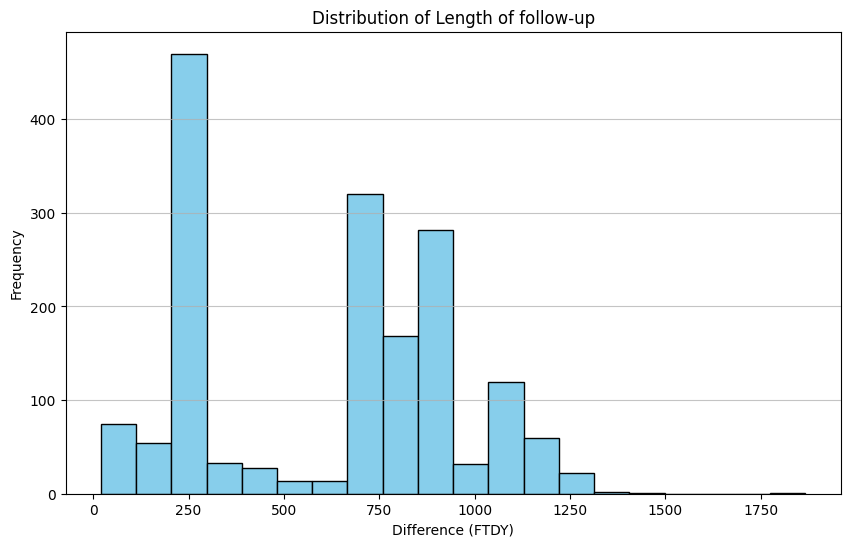

In [22]:
# Calculate the maximum and minimum values of FTDY for each unique patient ID
ftests_max_min = ftests.groupby('USUBJID')['FTDY'].agg(['max', 'min']).reset_index()

# Calculate the difference between the maximum and minimum values
ftests_max_min['Difference'] = ftests_max_min['max'] - ftests_max_min['min']

# Display the number of unique values in the "Difference" column
num_unique_values = ftests_max_min['Difference'].nunique()
print(f"Number of unique values in the 'Difference' column: {num_unique_values}")

# Plot the histogram of the distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(ftests_max_min['Difference'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Length of follow-up')
plt.xlabel('Difference (FTDY)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [23]:
negative_ftdy_rows = ftests[ftests['FTDY'] < 0]
negative_ftdy_rows
# 1/6th of all rows in the dataframe so is substantial

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
30678,MSOAC/0016,1,T25FW001,T25FW1-More Than Two Attempts,T25FW,NaN,N,NaN,1.0,SCREENING,NaN,-21.0,NaN
30622,MSOAC/0016,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,9.4,9.4,1.0,SCREENING,NaN,-21.0,1.0
30626,MSOAC/0016,3,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,9.7,9.7,1.0,SCREENING,NaN,-21.0,2.0
37146,MSOAC/0016,4,T25FW002,T25FW1-More Than Two Attempts,T25FW,NaN,N,NaN,2.0,VISIT 0,NaN,-14.0,NaN
37116,MSOAC/0016,5,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,8.3,8.3,2.0,VISIT 0,NaN,-14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,MSOAC/9998,26,PASAT003,PASAT1-Total Correct,PASAT,3 SECONDS,37,37.0,-1.0,SCREENING -1,NaN,-7.0,NaN
42193,MSOAC/9998,27,PASAT003,PASAT1-More Than One Attempt,PASAT,NaN,N,NaN,-1.0,SCREENING -1,NaN,-7.0,NaN
41962,MSOAC/9998,28,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,5.8,5.8,-1.0,SCREENING -1,NaN,-7.0,1.0
41968,MSOAC/9998,29,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,6,6.0,-1.0,SCREENING -1,NaN,-7.0,2.0


- FTREPNUM (Repetition Number) is discrete

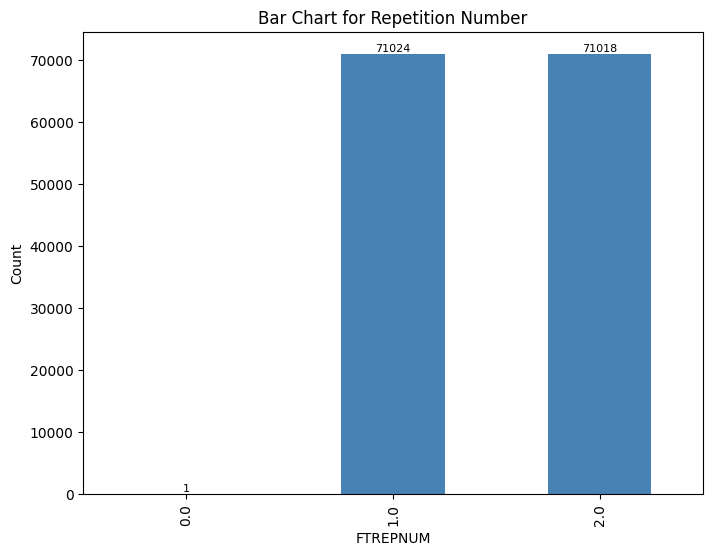

In [24]:
FTREPNUM_ftests = ftests['FTREPNUM'].dropna()

plt.figure(figsize=(8, 6))
ax = FTREPNUM_ftests.value_counts().sort_index().plot(kind='bar', color='steelblue')  # Sorting the index

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTREPNUM')
plt.ylabel('Count')
plt.title('Bar Chart for Repetition Number')
plt.show()

Only 1 row seems to have a repetition number of 0, might be a data entry error. Looking at this row shows that it is the measurement of the Time to Complete 25-Foot Walk for patient with ID 7430. The value for the test outcome is missing. 

In [25]:
row_with_ftrepnum_0 = ftests[ftests['FTREPNUM'] == 0]
row_with_ftrepnum_0

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
213718,MSOAC/7430,51,T25FW006,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,NaN,NaN,11.0,V11 - MONTH 18,NaN,NaN,0.0


In [26]:
filtered_rows = ftests[(ftests['FTTEST'] == 'T25FW1-Time to Complete 25-Foot Walk') & (ftests['USUBJID'] == 'MSOAC/7430')]
filtered_rows

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
185627,MSOAC/7430,1,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.9,4.9,1.0,V1 - SCREENING,NaN,NaN,1.0
185448,MSOAC/7430,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.5,4.5,1.0,V1 - SCREENING,NaN,NaN,2.0
185685,MSOAC/7430,11,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,5,5.0,1.0,V1 - SCREENING,NaN,NaN,1.0
185580,MSOAC/7430,12,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.8,4.8,1.0,V1 - SCREENING,NaN,NaN,2.0
193384,MSOAC/7430,21,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.4,4.4,2.0,V2 - BASELINE,NaN,NaN,1.0
193477,MSOAC/7430,22,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.6,4.6,2.0,V2 - BASELINE,NaN,NaN,2.0
199076,MSOAC/7430,31,T25FW004,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4,4.0,7.0,V7 - MONTH 6,NaN,NaN,1.0
199077,MSOAC/7430,32,T25FW004,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4,4.0,7.0,V7 - MONTH 6,NaN,NaN,2.0
205902,MSOAC/7430,41,T25FW005,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.2,4.2,9.0,V9 - MONTH 12,NaN,NaN,1.0
205903,MSOAC/7430,42,T25FW005,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.2,4.2,9.0,V9 - MONTH 12,NaN,NaN,2.0


Upon inspection, it seems that the repetition number of 0 needed to be a 1 instead.

In [27]:
row_with_ftrepnum_0 = ftests[ftests['FTREPNUM'] == 0]
ftests.loc[row_with_ftrepnum_0.index, 'FTREPNUM'] = 1

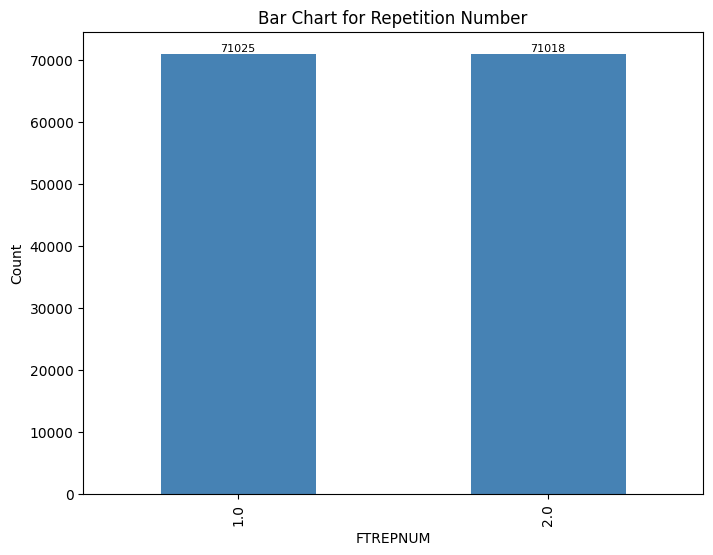

In [28]:
FTREPNUM_ftests = ftests['FTREPNUM'].dropna()

plt.figure(figsize=(8, 6))
ax = FTREPNUM_ftests.value_counts().sort_index().plot(kind='bar', color='steelblue')  # Sorting the index

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTREPNUM')
plt.ylabel('Count')
plt.title('Bar Chart for Repetition Number')
plt.show()

- Descriptive statistics for categorical variables

In [29]:
categorical_columns = ['FTGRPID', 'FTTEST', 'FTCAT', 'FTSCAT', 'FTSTRESC', 'VISIT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': ftests[col].count(),
        'Missing Cases': ftests[col].isna().sum(),
        'Missing %': round((ftests[col].isna().sum() / len(ftests)) * 100, 2),
        'Unique Values': ftests[col].nunique(),
        'Mode': ftests[col].mode().values[0],
        'Mode Frequency': ftests[col].value_counts().max()
    }

cat_ftests = pd.DataFrame(descriptive_categorical).T
cat_ftests

,Count,Missing Cases,Missing %,Unique Values,Mode,Mode Frequency
FTGRPID,160594,80762,33.46,54,NHPT001,7623
FTTEST,241356,0,0.0,9,NHPT01-Time to Complete 9-Hole Peg Test,93741
FTCAT,241356,0,0.0,4,NHPT,123559
FTSCAT,160482,80874,33.51,4,DOMINANT HAND,61836
FTSTRESC,237692,3664,1.52,1669,N,62617
VISIT,241356,0,0.0,99,SCREENING,17056


- Number of observations for each FTGRPID (group ID) category

In [30]:
FTGRPID_counts = ftests['FTGRPID'].value_counts().reset_index()
FTGRPID_counts.columns = ['FTGRPID', 'Count']
FTGRPID_counts = FTGRPID_counts.sort_values(by='FTGRPID')
FTGRPID_counts

,FTGRPID,Count
0,NHPT001,7623
1,NHPT002,7497
2,NHPT003,7364
3,NHPT004,7150
5,NHPT005,6878
9,NHPT006,6325
12,NHPT007,5677
26,NHPT008,2418
29,NHPT009,1945
33,NHPT010,1602


13 NHPT groups, 20 PASAT groups, 21 T25FW groups ('groups' means here how many times a test was maximally repeated for the same patient) - no groups for SDMT: maximally performed once for each patient

- Number of observations for each FTTEST (functional test name) category

In [31]:
FTTEST_counts = ftests['FTTEST'].value_counts().reset_index()
FTTEST_counts.columns = ['FTTEST', 'Count']
FTTEST_counts = FTTEST_counts.sort_values(by='FTTEST')
FTTEST_counts

,FTTEST,Count
8,Functional Test,129
3,NHPT01-More Than Two Attempts,29782
0,NHPT01-Time to Complete 9-Hole Peg Test,93741
5,PASAT1-More Than One Attempt,13426
2,PASAT1-Total Correct,33511
6,SDMT01-Total Score,2444
7,T25FW1-Complete Two Successful Trials,208
4,T25FW1-More Than Two Attempts,19702
1,T25FW1-Time to Complete 25-Foot Walk,48413


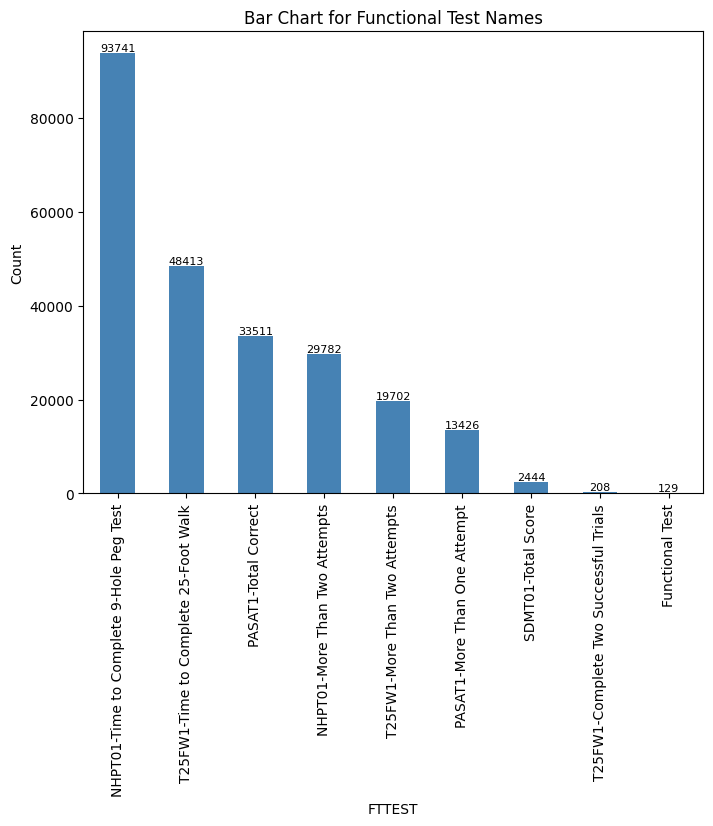

In [32]:
plt.figure(figsize=(8, 6))
ax = ftests['FTTEST'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTTEST')
plt.ylabel('Count')
plt.title('Bar Chart for Functional Test Names')
plt.show()

- Number of observations for each FTCAT (category of functional test) category

In [33]:
FTCAT_counts = ftests['FTCAT'].value_counts().reset_index()
FTCAT_counts.columns = ['FTCAT', 'Count']
FTCAT_counts

,FTCAT,Count
0,NHPT,123559
1,T25FW,68377
2,PASAT,46976
3,SDMT,2444


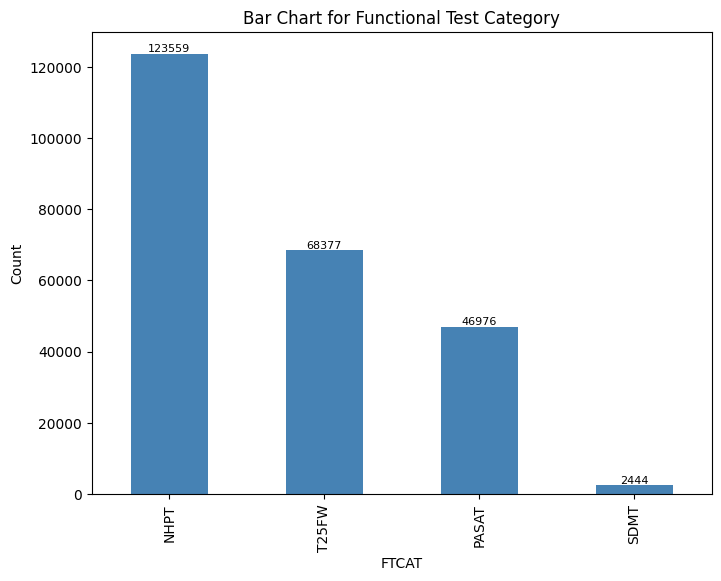

In [34]:
plt.figure(figsize=(8, 6))
ax = ftests['FTCAT'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTCAT')
plt.ylabel('Count')
plt.title('Bar Chart for Functional Test Category')
plt.show()

- Number of observations for each FTSCAT (subcategory of functional test) category

In [35]:
FTSCAT_counts = ftests['FTSCAT'].value_counts().reset_index()
FTSCAT_counts.columns = ['FTSCAT', 'Count']
FTSCAT_counts = FTSCAT_counts.sort_values(by='FTSCAT')
FTSCAT_counts

,FTSCAT,Count
3,2 SECONDS,10061
2,3 SECONDS,26898
0,DOMINANT HAND,61836
1,NON-DOMINANT HAND,61687


In [36]:
# Create a cross-tabulation for FTSCAT and FTTEST
cross_table = pd.crosstab(index=ftests['FTSCAT'], columns=ftests['FTTEST'])
cross_table

FTTEST,NHPT01-More Than Two Attempts,NHPT01-Time to Complete 9-Hole Peg Test,PASAT1-More Than One Attempt,PASAT1-Total Correct
FTSCAT,,,,
2 SECONDS,0,0,0,10061
3 SECONDS,0,0,3448,23450
DOMINANT HAND,14917,46919,0,0
NON-DOMINANT HAND,14865,46822,0,0


- Number of observations for each FTSTRESC (Character Result/Finding in Std Format) category

**NOTE:** This column gives the results for functional tests with both a numeric and categorical outcome. However, the numeric values are not formatted in a standardized way, only the categorical ones are. Since we already looked at the numeric outcomes in FTSTRESN, we will focus only on the categorical outcomes for this variable.

In [37]:
FTSTRESC_counts = ftests['FTSTRESC'].value_counts().reset_index()
FTSTRESC_counts.columns = ['FTSTRESC', 'Count']
FTSTRESC_counts
# contains both yes/no and numbers, should be looked at together with FTTEST!

,FTSTRESC,Count
0,N,62617
1,60,2809
2,59,2004
3,58,1709
4,57,1532
...,...,...
1664,210.5,1
1665,232.6,1
1666,354.7,1
1667,183.9,1


In [38]:
# Define the 'FTTEST' values with a categorical outcome
cat_FTTEST_values = [
    'T25FW1-Complete Two Successful Trials',
    'T25FW1-More Than Two Attempts',
    'NHPT01-More Than Two Attempts',
    'PASAT1-More Than One Attempt',
]

In [39]:
# Filter the DataFrame based on cat_FTTEST_values
filtered_ftests = ftests[ftests['FTTEST'].isin(cat_FTTEST_values)]

# Create a cross-tabulation for counts
counts_table = pd.crosstab(index=filtered_ftests['FTTEST'], columns=filtered_ftests['FTSTRESC'], margins=True, margins_name='Total')
counts_table

FTSTRESC,N,Y,Total
FTTEST,,,
NHPT01-More Than Two Attempts,29619,163,29782
PASAT1-More Than One Attempt,13368,58,13426
T25FW1-Complete Two Successful Trials,0,208,208
T25FW1-More Than Two Attempts,19630,69,19699
Total,62617,498,63115


When FTTEST = Functional Test, the outcomes are always missing. We do have the category saying which functional test it refers to, but don't know if it's time to completion or more than x attempts. 

In [40]:
functional_test_rows = ftests[ftests['FTTEST'] == 'Functional Test']
functional_test_rows

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
176140,MSOAC/0757,138,T25FW014,Functional Test,T25FW,NaN,NaN,NaN,997.0,EARLY/TERMINATION,NaN,905.0,NaN
18756,MSOAC/1266,1,NaN,Functional Test,NHPT,NaN,NaN,NaN,-3.0,SCREENING -3,NaN,-34.0,NaN
18757,MSOAC/1266,2,PASAT001,Functional Test,PASAT,NaN,NaN,NaN,-3.0,SCREENING -3,NaN,-34.0,NaN
18770,MSOAC/1266,3,T25FW001,Functional Test,T25FW,NaN,NaN,NaN,-3.0,SCREENING -3,NaN,-34.0,NaN
152566,MSOAC/1814,101,NaN,Functional Test,NHPT,NaN,NaN,NaN,21.0,MONTH 21,NaN,624.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35718,MSOAC/9536,13,T25FW002,Functional Test,T25FW,NaN,NaN,NaN,-2.0,SCREENING -2,NaN,-14.0,NaN
156434,MSOAC/9572,105,T25FW010,Functional Test,T25FW,NaN,NaN,NaN,21.0,MONTH 21,NaN,642.0,NaN
63985,MSOAC/9781,25,T25FW010,Functional Test,T25FW,NaN,NaN,NaN,9.2,VISIT 7: HOUR 1,NaN,64.0,NaN
64060,MSOAC/9781,26,T25FW011,Functional Test,T25FW,NaN,NaN,NaN,9.3,VISIT 7: HOUR 2,NaN,64.0,NaN


In [41]:
unique_FTSTRESN = functional_test_rows['FTSTRESN'].unique()
unique_FTSTRESC = functional_test_rows['FTSTRESC'].unique()

print(f"Unique FTSTRESN values: {unique_FTSTRESN}")
print(f"\nUnique FTSTRESC values: {unique_FTSTRESC}")


Unique FTSTRESN values: [nan]

Unique FTSTRESC values: [nan]


In [42]:
(129/len(ftests))*100 #only 0.05% - can we just remove these obs?

0.05344801869437677

We will remove these observations because they do not provide any information (all missing and don't know which outcome is recorded).

In [43]:
# Filter rows where 'FTTEST' is not equal to 'Functional Test'
ftests = ftests[ftests['FTTEST'] != 'Functional Test']

Also remove more than x attempts for reasons I need to write out (investigation in Excel) - REMOVE THESE BUT NEED TO EXPLAIN WHY

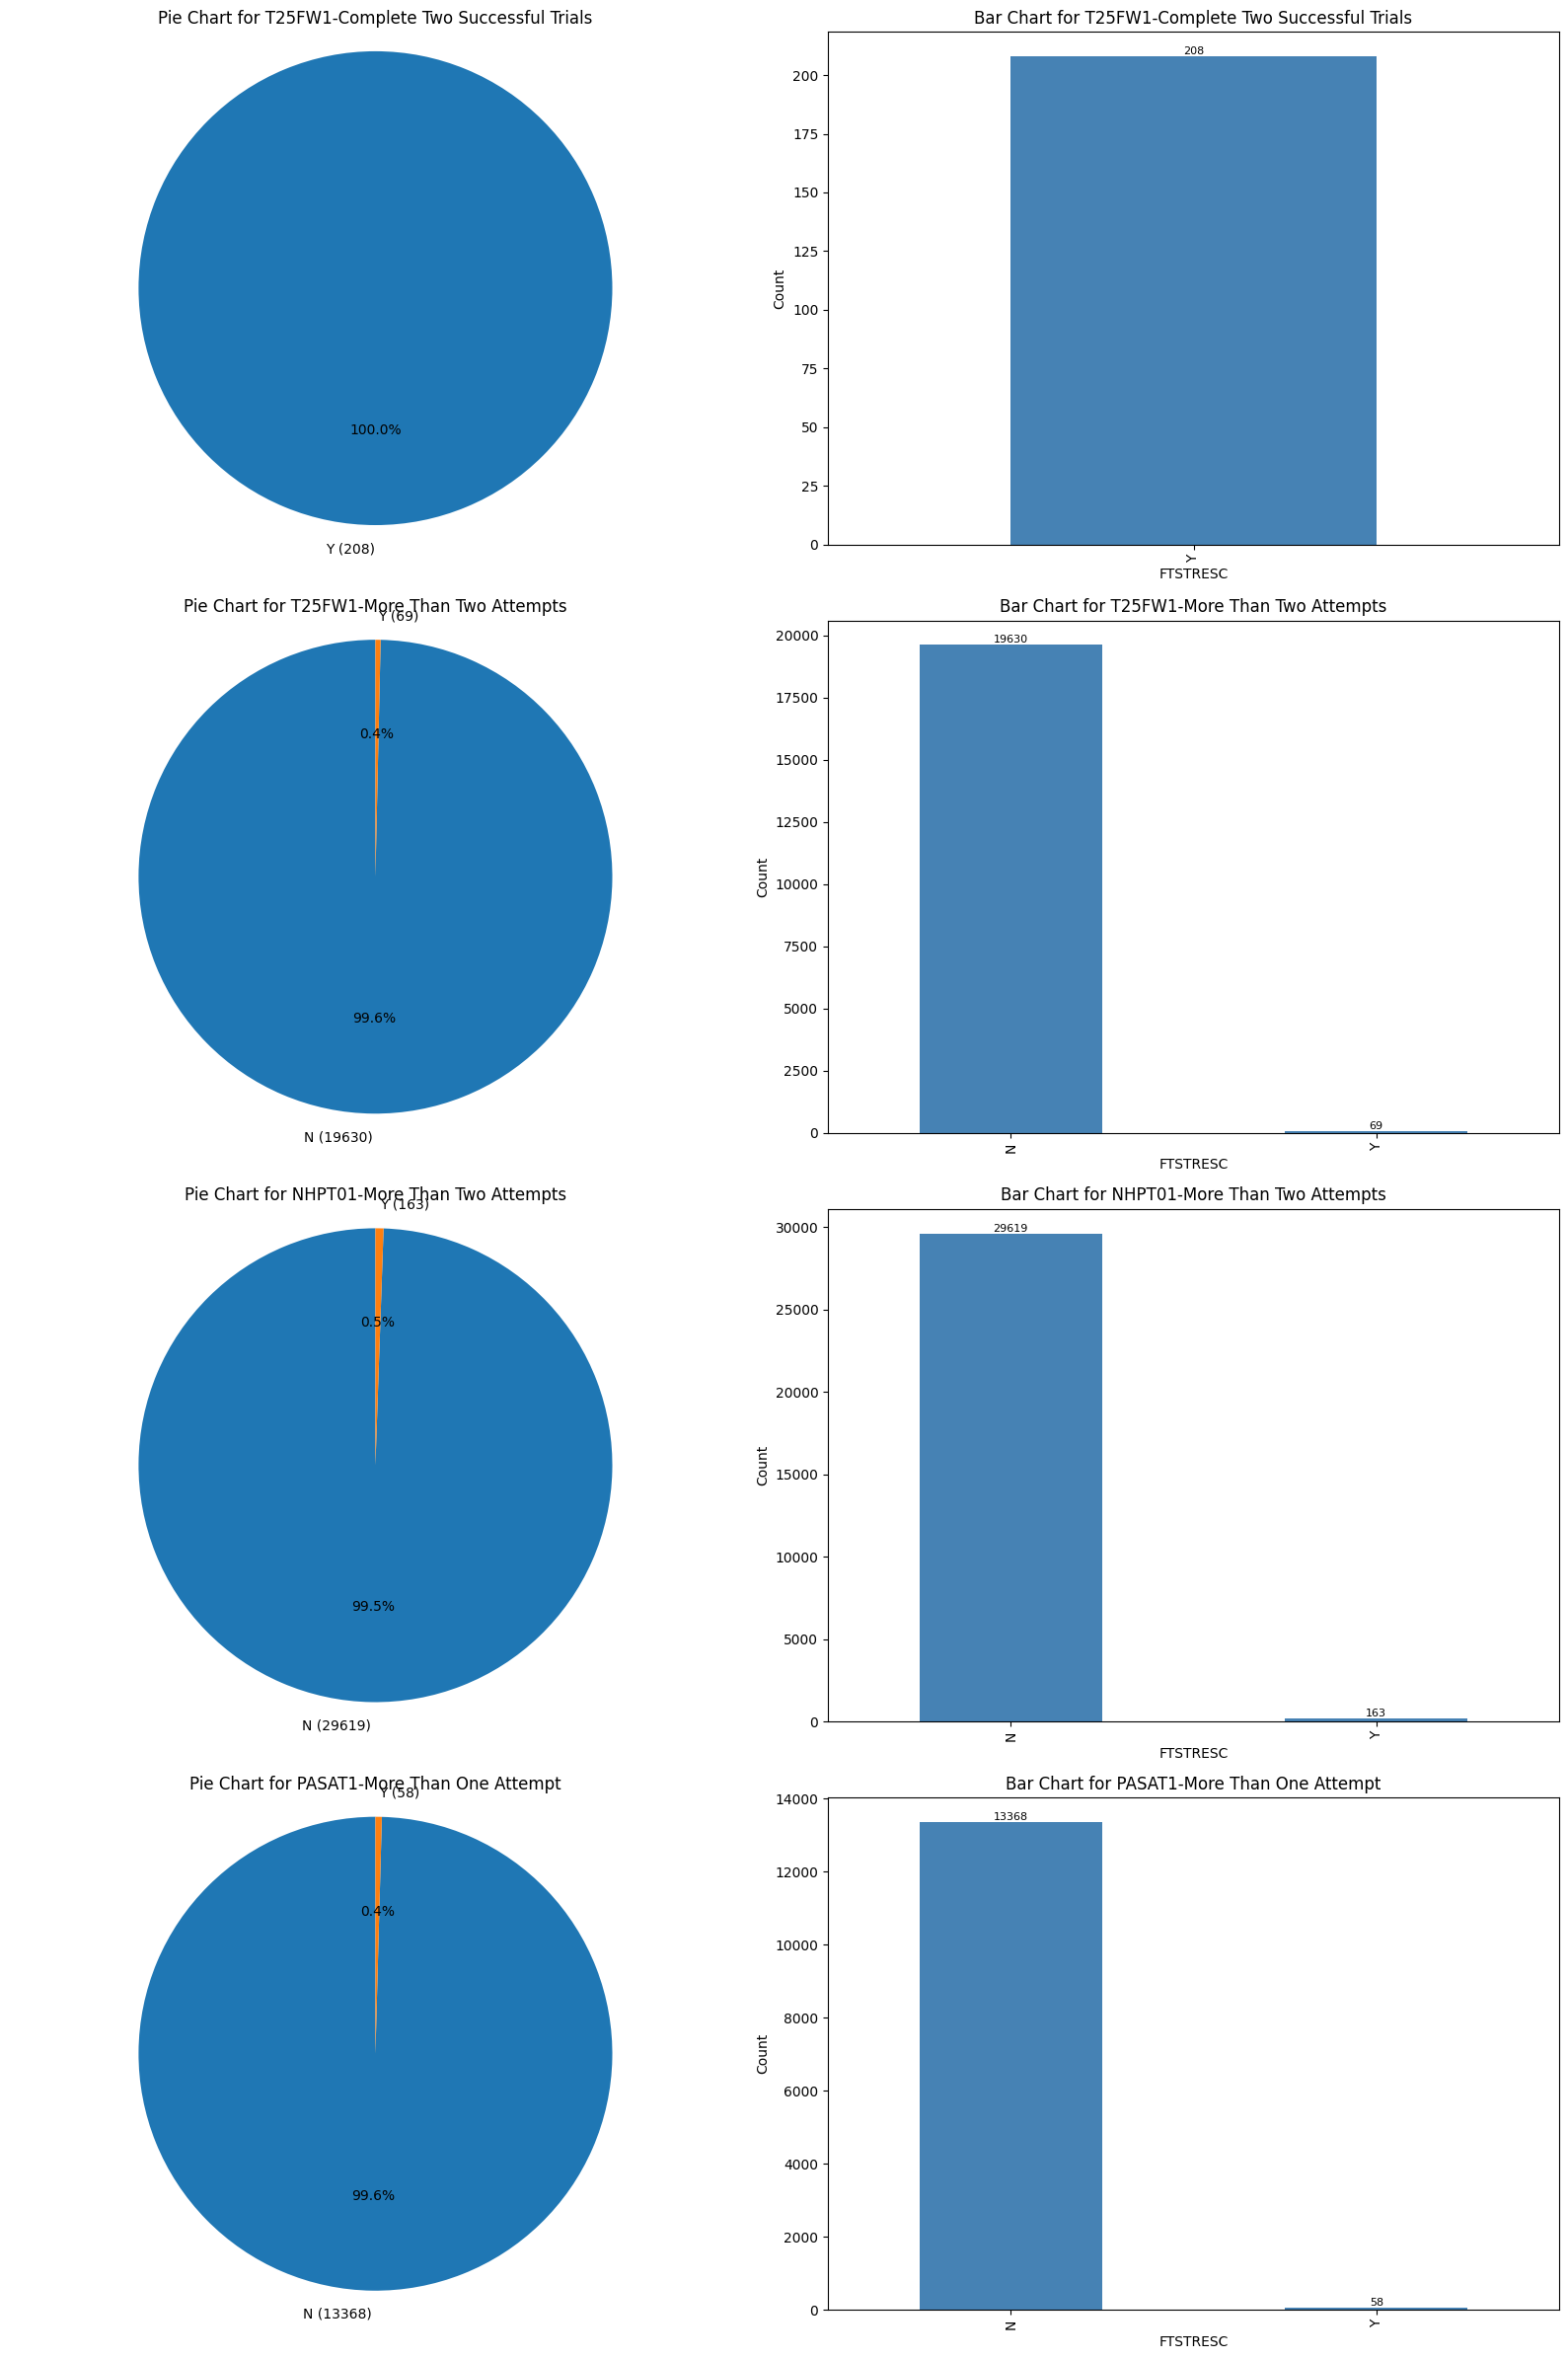

In [44]:
fig, axes = plt.subplots(nrows=len(cat_FTTEST_values), ncols=2, figsize=(16, 6 * len(cat_FTTEST_values)))

# Iterate over categorical FTTEST values
for i, fttest_value in enumerate(cat_FTTEST_values):
    subset_data_fttest = ftests[ftests['FTTEST'] == fttest_value]
    
    # Pie chart for FTSTRESC
    category_counts_ftstresc = subset_data_fttest['FTSTRESC'].value_counts()
    if not category_counts_ftstresc.empty:
        percentages = category_counts_ftstresc / category_counts_ftstresc.sum() * 100
        labels = [f"{category} ({count})" for category, count in zip(category_counts_ftstresc.index, category_counts_ftstresc)]
        
        axes[i, 0].pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
        axes[i, 0].axis('equal')
        axes[i, 0].set_title(f'Pie Chart for {fttest_value}')

    # Bar chart for FTSTRESC
    if not category_counts_ftstresc.empty:
        ax = subset_data_fttest['FTSTRESC'].value_counts().plot(kind='bar', color='steelblue', ax=axes[i, 1])
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)
        axes[i, 1].set_xlabel('FTSTRESC')
        axes[i, 1].set_ylabel('Count')
        axes[i, 1].set_title(f'Bar Chart for {fttest_value}')

plt.tight_layout()
plt.show()

- Number of observations for each VISIT (Visit Name) category 

In [45]:
VISIT_counts = ftests['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,SCREENING,17056
1,BASELINE,12829
2,V1 - SCREENING,8211
3,WEEK 12,7847
4,WEEK 24,7670
...,...,...
94,WEEK 128,35
95,RELAPSE VISIT 4,34
96,MONTH 48,30
97,RELAPSE VISIT 5,23


### Create a static dataframe

In [46]:
FTDY.describe()

count    181487.000000
mean        263.082551
std         295.597788
min       -1138.000000
25%           1.000000
50%         173.000000
75%         456.000000
max        1404.000000
Name: FTDY, dtype: float64

The day of test ranges from approximately 3 years before study start until approximately 4 years after study start. 

In [47]:
filtered_rows = ftests[ftests['FTTEST'].isin(num_FTTEST_values)]

# Calculate the percentage of missing values for the 'FTDY' column for each outcome (each value in 'FTTEST') 
missing_percentages = filtered_rows.groupby('FTTEST')['FTDY'].apply(lambda x: (x.isnull().sum() / len(x)) * 100)
print("Missing percentage of study day for each outcome:")
print(missing_percentages.round(2))

Missing percentage of study day for each outcome:
FTTEST
NHPT01-Time to Complete 9-Hole Peg Test    25.66
PASAT1-Total Correct                       18.01
SDMT01-Total Score                          0.00
T25FW1-Time to Complete 25-Foot Walk       24.92
Name: FTDY, dtype: float64


Check separately before study start, 2 years after study start & 4 years after study start - how many observations are there for each test outcome? (rather than the entire dataframe, to see if it makes sense to take an average or maximum of a particular score for that particular time period)

NOTE: they said the number of observations per time period doesn't matter, u will just assume that if u only have 1 or 2 that these are representative for that certain time period which is not an unusual assumption to make (meeting) because reason for aggregating is not for averaging out outlying values, we just want to limit the number of columns so it doesn't matter how many measurements u actually have 

In [48]:
# Create subsets for different time periods
before_study_start = ftests[ftests['FTDY'] < 1]
two_years_after_start = ftests[(ftests['FTDY'] >= 1) & (ftests['FTDY'] <= 730)]
four_years_after_start = ftests[ftests['FTDY'] > 730]

# Function to count observations for a given subset
def count_observations(subset, title):
    filtered_rows = subset[subset['FTTEST'].isin(num_FTTEST_values)]
    outcome_measure_counts = filtered_rows.groupby(['FTTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('FTTEST')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Before Study Start')


Before Study Start


,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-Time to Complete 9-Hole Peg Test,1621.0,10.534855,3.105678,4.0,12.0,12.0,12.0,16.0
PASAT1-Total Correct,1620.0,3.807407,1.583171,1.0,3.0,3.0,6.0,8.0
SDMT01-Total Score,494.0,1.006073,0.077770,1.0,1.0,1.0,1.0,2.0
T25FW1-Time to Complete 25-Foot Walk,1688.0,5.299763,1.530237,2.0,6.0,6.0,6.0,8.0


In [49]:
count_observations(two_years_after_start, '2 Years After Study Start')


2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-Time to Complete 9-Hole Peg Test,1622.0,28.357583,10.532890,4.0,16.0,36.0,36.0,64.0
PASAT1-Total Correct,1622.0,11.426017,6.545085,1.0,4.0,9.0,18.0,32.0
SDMT01-Total Score,500.0,3.894000,0.528510,1.0,4.0,4.0,4.0,5.0
T25FW1-Time to Complete 25-Foot Walk,1692.0,14.245863,5.195283,2.0,8.0,18.0,18.0,32.0


In [50]:
count_observations(four_years_after_start, '4 Years After Study Start')


4 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-Time to Complete 9-Hole Peg Test,648.0,10.203704,5.375126,4.0,8.0,8.0,16.0,32.0
PASAT1-Total Correct,648.0,4.279321,3.158474,2.0,2.0,2.0,8.0,16.0
T25FW1-Time to Complete 25-Foot Walk,645.0,5.114729,2.675374,2.0,4.0,4.0,8.0,16.0


Based on this, we will keep the split for all numeric test outcomes except for the SDMT. For this one we will just look at the entirety of the dataset. -- actually might also keep split for SDMT since number of observations per time bin doesn't matter

use disjoint time bins because we want to allow for improvements over time and a min/max up until a time period will no longer allow for improvement in performance

In [51]:
# Filter the DataFrame to include only the specified FTTEST values
filtered_df = ftests[ftests['FTTEST'].isin(num_FTTEST_values)].copy()  # Create a copy to avoid the warning

conditions = [
    (filtered_df['FTDY'] < 1),
    ((filtered_df['FTDY'] >= 1) & (filtered_df['FTDY'] <= 730)),
    (filtered_df['FTDY'] > 730)
]

# Define corresponding values for each condition
values = ['before', '2y', '4y']

# Create the new column "FT_PERIOD"
filtered_df['FT_PERIOD'] = np.select(conditions, values, default='NaN')
filtered_df = filtered_df.dropna(subset=['FTDY']) #Drop observations for which we don't have time of test - note that ~700 patients don't have the time recorded so they will only have NAs
filtered_df.head()

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM,FT_PERIOD
30622,MSOAC/0016,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,9.4,9.4,1.0,SCREENING,NaN,-21.0,1.0,before
30626,MSOAC/0016,3,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,9.7,9.7,1.0,SCREENING,NaN,-21.0,2.0,before
37116,MSOAC/0016,5,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,8.3,8.3,2.0,VISIT 0,NaN,-14.0,1.0,before
37121,MSOAC/0016,6,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,8.6,8.6,2.0,VISIT 0,NaN,-14.0,2.0,before
42339,MSOAC/0016,8,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,7.9,7.9,3.0,VISIT 1,NaN,-7.0,1.0,before


Note that we need to make a distinction between the 2 and 3 second versions of the PASAT test because one version is a bit easier than the other, so a comparison would be unfair. The same goes for the NHPT which can be done with one's dominant or non-dominant hand. However, since the distribution between (non-)dominant hand is balanced, we don't take this into account. For PASAT however, the distribution between the 2 and 3 second version is unbalanced, so we will make the distinction between both versions of the test. 

In [52]:
# Replace 'PASAT' with 'PASAT_2S' when 'FTCAT' is 'PASAT' and 'FTSCAT' is 2
filtered_df.loc[(filtered_df['FTCAT'] == 'PASAT') & (filtered_df['FTSCAT'] == '2 SECONDS'), 'FTCAT'] = 'PASAT_2s'

# Replace 'PASAT' with 'PASAT_3S' when 'FTCAT' is 'PASAT' and 'FTSCAT' is 3
filtered_df.loc[(filtered_df['FTCAT'] == 'PASAT') & (filtered_df['FTSCAT'] == '3 SECONDS'), 'FTCAT'] = 'PASAT_3s'

We want the worst performance in a certain time period so calculate the maximum time to complete T25FW or NHPT and the minimum total score for PASAT and SDMT.

In [53]:
# Calculate the max or min of 'FTSTRESN' for each combination of 'FTCAT' and 'FT_PERIOD' for each patient (max for time to complete, min for total score)
max_df = filtered_df.groupby(['USUBJID', 'FTCAT', 'FT_PERIOD']).agg({
    'FTSTRESN': lambda x: x.max() if 'T25FW' in x.name or 'NHPT' in x.name else x.min()
}).reset_index()

# Pivot the table
pivot_df = max_df.pivot_table(index='USUBJID', columns=['FTCAT', 'FT_PERIOD'], values='FTSTRESN').reset_index()

# Flatten the multi-level column index
pivot_df.columns = [f'{cat}-{period}' if period != '' else cat for cat, period in pivot_df.columns]

# Reorganize the columns
column_order = ['USUBJID'] + sorted(
    [col for col in pivot_df.columns if col != 'USUBJID'],
    key=lambda x: (
        x.split('-')[0],  # Sort by category
        0 if 'before' in x else int(x.split('-')[1][0])  # Sort 'before' first, then by year
    )
)

# Merge the new dataframe with the original dataframe on 'USUBJID'
result_df = pd.merge(filtered_df[['USUBJID']], pivot_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient
result_df = result_df.drop_duplicates(subset='USUBJID')

# Reorder the columns based on the desired order
result_df = result_df[column_order]
result_df

,USUBJID,NHPT-before,NHPT-2y,NHPT-4y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-4y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-4y,SDMT-before,SDMT-2y,T25FW-before,T25FW-2y,T25FW-4y
0,MSOAC/0016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8,5.9,NaN
24,MSOAC/0019,20.3,18.0,18.3,24.0,33.0,33.0,36.0,43.0,51.0,NaN,NaN,6.0,5.7,5.4
152,MSOAC/0024,29.6,25.1,NaN,48.0,47.0,NaN,57.0,57.0,NaN,NaN,NaN,4.3,4.4,NaN
248,MSOAC/0030,14.8,15.0,NaN,NaN,NaN,NaN,56.0,58.0,NaN,70.0,57.0,4.6,4.2,NaN
302,MSOAC/0031,14.2,14.9,16.1,NaN,NaN,NaN,53.0,54.0,58.0,NaN,NaN,3.5,3.8,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135500,MSOAC/9980,20.8,21.0,NaN,NaN,NaN,NaN,56.0,59.0,NaN,60.0,63.0,4.6,4.3,NaN
135562,MSOAC/9981,20.1,17.4,NaN,25.0,24.0,NaN,35.0,36.0,NaN,NaN,NaN,7.6,6.9,NaN
135674,MSOAC/9985,17.2,14.8,NaN,48.0,54.0,NaN,53.0,56.0,NaN,NaN,NaN,6.1,5.6,NaN
135770,MSOAC/9986,18.0,16.6,NaN,NaN,NaN,NaN,58.0,58.0,NaN,45.0,57.0,3.5,3.4,NaN


In [54]:
# Calculate the percentage of missing values for each column
missing_percentage = result_df.isnull().mean() * 100

# Sort the values from high to low
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print(missing_percentage_sorted)

PASAT_2s-4y        79.491726
SDMT-before        70.803783
SDMT-2y            70.449173
T25FW-4y           63.829787
PASAT_3s-4y        61.938534
NHPT-4y            61.820331
PASAT_2s-before    55.378251
PASAT_2s-2y        54.018913
PASAT_3s-before     4.314421
NHPT-before         4.196217
PASAT_3s-2y         4.196217
NHPT-2y             4.137116
T25FW-before        0.531915
T25FW-2y            0.059102
USUBJID             0.000000
dtype: float64


high % of missing values is ok - don't look at this here but do it for the final dataset because now not all patients are here

don't need this but just to see what is the distribution in the test outcomes when looking at maximum for each patient (overall maximum, not taking time into account)

In [55]:
# Filter the DataFrame to include only the specified FTTEST values
filtered_df = ftests[ftests['FTTEST'].isin(num_FTTEST_values)].copy()  # Create a copy to avoid the warning

# Extract the desired part of the string from FTTEST and use it as the new column names
filtered_df['FTTEST'] = filtered_df['FTTEST'].str.split('-').str[0]

# Group by USUBJID and FTTEST, calculate the average, and pivot the table
grouped_df = filtered_df.groupby(['USUBJID', 'FTTEST']).agg({'FTSTRESN': 'max'}).reset_index()
pivot_df = grouped_df.pivot_table(index='USUBJID', columns='FTTEST', values='FTSTRESN', fill_value=None).reset_index()

# Merge the new dataframe with the original dataframe on 'USUBJID'
result_df = pd.merge(ftests[['USUBJID']], pivot_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient
result_df = result_df.drop_duplicates(subset='USUBJID')
result_df

,USUBJID,NHPT01,PASAT1,SDMT01,T25FW1
0,MSOAC/0014,25.6,59.0,NaN,4.5
20,MSOAC/0016,NaN,NaN,NaN,9.7
56,MSOAC/0019,29.2,56.0,NaN,6.9
215,MSOAC/0024,54.0,60.0,NaN,5.9
359,MSOAC/0030,21.3,60.0,71.0,5.2
...,...,...,...,...,...
240746,MSOAC/9986,24.1,60.0,61.0,4.4
240828,MSOAC/9987,20.2,60.0,NaN,5.5
240917,MSOAC/9995,33.3,59.0,NaN,6.1
241007,MSOAC/9998,32.6,45.0,NaN,55.9


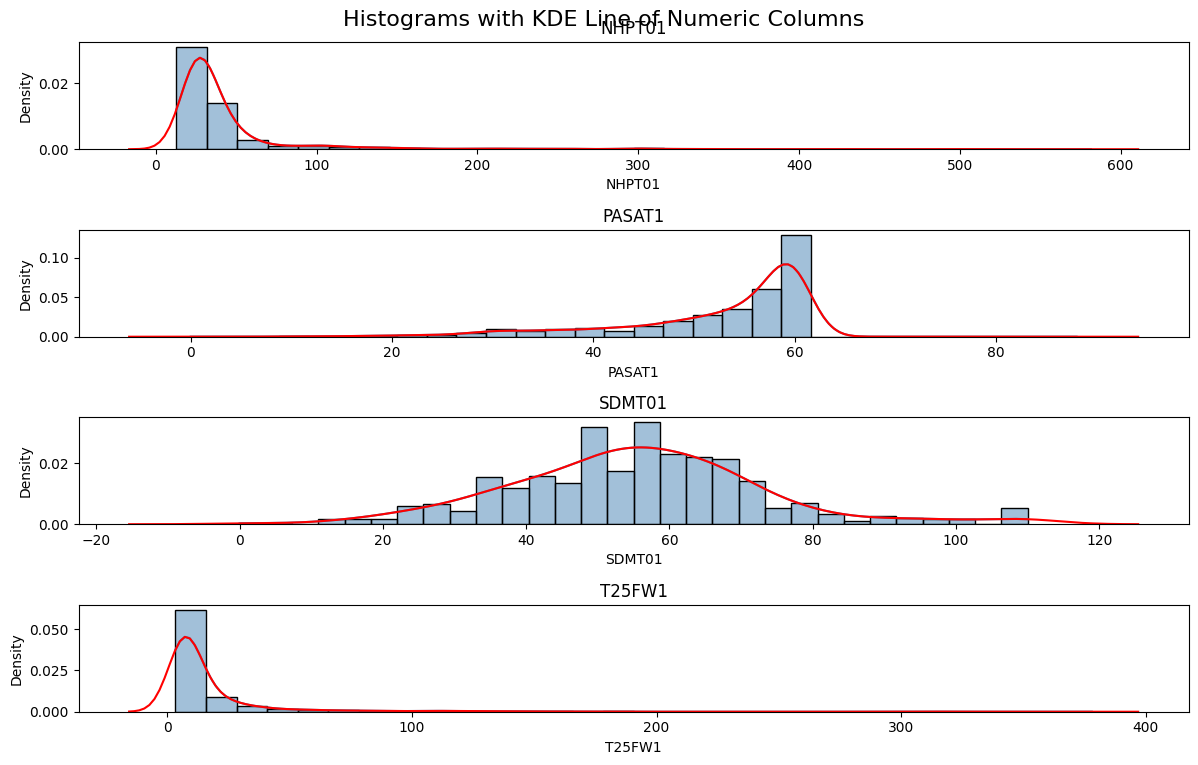

In [56]:
# Select only numeric columns
numeric_columns = result_df.select_dtypes(include='number').columns

# Set up the plotting space
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 2 * len(numeric_columns)))

# Plot histograms and density plots for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(result_df[col], kde=True, bins=30, color='steelblue', ax=axes[i], stat="density", common_norm=False)
    sns.kdeplot(result_df[col], color='red', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.suptitle('Histograms with KDE Line of Numeric Columns', y=0.95, fontsize=16)
plt.tight_layout()
plt.show()

### Export dataset

In [57]:
#ftests.to_csv('FT_prep.csv', index=False)

In [58]:
filtered_rows = ftests[(ftests['FTTEST'].str.contains('Attempt')) & (ftests['FTSTRESC'] == 'Y')]

# Print the resulting DataFrame
filtered_rows

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
30159,MSOAC/0024,12,NaN,NHPT01-More Than Two Attempts,NHPT,NON-DOMINANT HAND,Y,NaN,-1.2,PRIOR TO RANDOMIZATION -2,NaN,-21.0,NaN
96979,MSOAC/0053,33,PASAT006,PASAT1-More Than One Attempt,PASAT,NaN,Y,NaN,6.0,VISIT 6,186.0,186.0,NaN
203638,MSOAC/0061,16,NHPT002,NHPT01-More Than Two Attempts,NHPT,DOMINANT HAND,Y,NaN,8.0,MONTH 6,NaN,NaN,NaN
210012,MSOAC/0061,29,NHPT003,NHPT01-More Than Two Attempts,NHPT,NON-DOMINANT HAND,Y,NaN,10.0,MONTH 12,NaN,NaN,NaN
188119,MSOAC/0067,9,NHPT001,NHPT01-More Than Two Attempts,NHPT,NON-DOMINANT HAND,Y,NaN,1.0,V1 - SCREENING,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115004,MSOAC/9845,54,NaN,NHPT01-More Than Two Attempts,NHPT,NON-DOMINANT HAND,Y,NaN,9.0,VISIT 9,276.0,276.0,NaN
161567,MSOAC/9865,72,NaN,NHPT01-More Than Two Attempts,NHPT,NON-DOMINANT HAND,Y,NaN,24.0,MONTH24,NaN,687.0,NaN
17858,MSOAC/9874,10,T25FW001,T25FW1-More Than Two Attempts,T25FW,NaN,Y,NaN,-3.0,SCREENING -3,NaN,-36.0,NaN
180745,MSOAC/9874,157,PASAT016,PASAT1-More Than One Attempt,PASAT,NaN,Y,NaN,36.0,MONTH 36,NaN,1112.0,NaN


In [59]:
unique_usubjid_values = filtered_rows['USUBJID'].unique()
unique_usubjid_values

array(['MSOAC/0024', 'MSOAC/0053', 'MSOAC/0061', 'MSOAC/0067',
       'MSOAC/0110', 'MSOAC/0111', 'MSOAC/0141', 'MSOAC/0168',
       'MSOAC/0194', 'MSOAC/0272', 'MSOAC/0275', 'MSOAC/0288',
       'MSOAC/0303', 'MSOAC/0391', 'MSOAC/0395', 'MSOAC/0489',
       'MSOAC/0495', 'MSOAC/0521', 'MSOAC/0539', 'MSOAC/0634',
       'MSOAC/0658', 'MSOAC/0856', 'MSOAC/0858', 'MSOAC/0859',
       'MSOAC/0888', 'MSOAC/0901', 'MSOAC/1001', 'MSOAC/1010',
       'MSOAC/1046', 'MSOAC/1067', 'MSOAC/1082', 'MSOAC/1194',
       'MSOAC/1265', 'MSOAC/1288', 'MSOAC/1478', 'MSOAC/1515',
       'MSOAC/1525', 'MSOAC/1587', 'MSOAC/1601', 'MSOAC/1672',
       'MSOAC/1717', 'MSOAC/1732', 'MSOAC/1738', 'MSOAC/1781',
       'MSOAC/1806', 'MSOAC/1869', 'MSOAC/1878', 'MSOAC/2019',
       'MSOAC/2053', 'MSOAC/2126', 'MSOAC/2221', 'MSOAC/2430',
       'MSOAC/2456', 'MSOAC/2466', 'MSOAC/2542', 'MSOAC/2597',
       'MSOAC/2682', 'MSOAC/2700', 'MSOAC/2719', 'MSOAC/2721',
       'MSOAC/2786', 'MSOAC/2817', 'MSOAC/2885', 'MSOAC